# Section 4-7 - Venus SmallSat Aerocapture - Performance Analysis

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [2]:
import numpy as np
from scipy import interpolate
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Polygon

## Small Run N = 10

In [3]:
# Create a planet object
planet=Planet("VENUS")
planet.h_skip = 150000.0
planet.h_low=10.0E3

# Load an nominal atmospheric profile with height, temp, pressure, density data
planet.loadAtmosphereModel('../../../atmdata/Venus/venus-gram-avg.dat', 0 , 1 ,2, 3)

# Set up a vehicle object
vehicle=Vehicle('SmallSat1', 37, 20, 0.0, 1.767, 0.0, 0.35, planet)
vehicle.setInitialState(150.0,-6.22,23.16,10.8191,89.9982,-5.30,0.0,0.0)
vehicle.setSolverParams(1E-6)
vehicle.setDragModulationVehicleParams(20, 7.5)

# Set up the drag modulation entry phase guidance parameters.
vehicle.setDragEntryPhaseParams(2.0, 20.0, 101, -200.0)

# Set the target orbit parameters.
vehicle.setTargetOrbitParams(200.0, 1800.0, 20.0)

# Define the path to atmospheric files to be used for the Monte Carlo simulations.
atmfiles = ['../../../atmdata/Venus/LAT20N.txt']

# Set up the Monte Carlo simulation for drag modulation.
# NPOS = 151, NMONTE = 200
# Target EFPA = -5.30 deg
# EFPA 1-sigma error = +/- 0.033 deg
# Nominal beta_1 = 20 kg/m2
# beta_1 1-sigma = 0.0
# guidance time step for entry = 1.0s (Freq. = 1 Hz)
# guidance time step after jettison = 1.0 s
# max. solver time step = 0.1 s
# max. time used by solver = 2400 s

vehicle.setupMonteCarloSimulationD(151, 200, atmfiles, 0 , 1, 2, 3, 4, True,
                                   -5.20,  0.0333, 20.0, 0.0,
                                    1.0, 1.0, 0.1, 2400.0)
# Run 200 trajectories
vehicle.runMonteCarloD2(10, '../../../data/acta-astronautica/smallsat-mission-concepts/venus/MCBX1')

RUN #: 1, PROF: ../../../atmdata/Venus/LAT20N.txt, SAMPLE #: 96, EFPA: -5.21, SIGMA: -1.82, APO : 2376.75
RUN #: 2, PROF: ../../../atmdata/Venus/LAT20N.txt, SAMPLE #: 107, EFPA: -5.20, SIGMA: -1.33, APO : 1606.78
RUN #: 3, PROF: ../../../atmdata/Venus/LAT20N.txt, SAMPLE #: 21, EFPA: -5.21, SIGMA: 0.91, APO : 2259.68
RUN #: 4, PROF: ../../../atmdata/Venus/LAT20N.txt, SAMPLE #: 97, EFPA: -5.14, SIGMA: 0.60, APO : 1755.19
RUN #: 5, PROF: ../../../atmdata/Venus/LAT20N.txt, SAMPLE #: 143, EFPA: -5.18, SIGMA: 0.17, APO : 1993.80
RUN #: 6, PROF: ../../../atmdata/Venus/LAT20N.txt, SAMPLE #: 81, EFPA: -5.22, SIGMA: 1.35, APO : 2910.43
RUN #: 7, PROF: ../../../atmdata/Venus/LAT20N.txt, SAMPLE #: 112, EFPA: -5.17, SIGMA: -0.10, APO : 1878.32
RUN #: 8, PROF: ../../../atmdata/Venus/LAT20N.txt, SAMPLE #: 88, EFPA: -5.17, SIGMA: -0.17, APO : 2031.74
RUN #: 9, PROF: ../../../atmdata/Venus/LAT20N.txt, SAMPLE #: 85, EFPA: -5.20, SIGMA: 1.59, APO : 1822.66
RUN #: 10, PROF: ../../../atmdata/Venus/LAT20N.t

## Production Run N = 1000

Run the file ```section-4-7-venus-smallsat-performance-analysis-prd.py```

In [3]:
p1  = np.loadtxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/MCB-Venus/terminal_periapsis_arr.txt')
x1  = np.loadtxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/MCB-Venus/terminal_apoapsis_arr.txt')
y1  = np.loadtxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/MCB-Venus/acc_net_g_max_arr.txt')
z1  = np.loadtxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/MCB-Venus/q_stag_max_arr.txt')
h1  = np.loadtxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/MCB-Venus/heatload_max_arr.txt')
u1  = np.loadtxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/MCB-Venus/periapsis_raise_DV_arr.txt')
v1  = np.loadtxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/MCB-Venus/apoapsis_raise_DV_arr.txt')

In [4]:
# Remove some anomalies in heat load
del_index1 = np.where(p1 < 95)
del_index1
x1[del_index1]

array([1145.57126041, 1120.8278335 ])

In [5]:
p1 = np.delete(p1, del_index1)
x1 = np.delete(x1, del_index1)
y1 = np.delete(y1, del_index1)
z1 = np.delete(z1, del_index1)
h1 = np.delete(h1, del_index1)

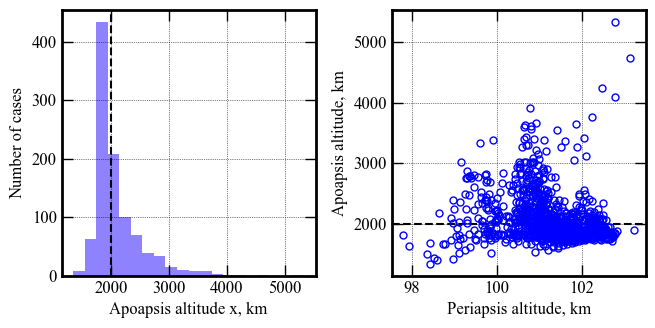

In [7]:
fig, axes = plt.subplots(1, 2, figsize = (6.5, 3.25))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].axvline(x=2000, linewidth=1.5, color='k', linestyle='dashed')
axes[0].hist(x1, bins=20, color='xkcd:periwinkle')
axes[0].set_xlabel('Apoapsis altitude x, km', fontsize=12)
axes[0].set_ylabel('Number of cases', fontsize=12)

axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=12)
axes[0].tick_params(axis='y',labelsize=12)

axes[1].axhline(y=2000, linewidth=1.5, color='k', linestyle='dashed')
axes[1].plot(p1, x1, 'bo', markersize=5, mfc='None')

axes[1].set_xlabel('Periapsis altitude, km',fontsize=12)
axes[1].set_ylabel('Apoapsis altitude, km', fontsize=12)


axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=12)
axes[1].tick_params(axis='y',labelsize=12)

for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)
        
plt.savefig('../../../data/acta-astronautica/smallsat-mission-concepts/venus/venus-smallsat-apoapsis-vs-periapsis.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/smallsat-mission-concepts/venus/venus-smallsat-apoapsis-vs-periapsis.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/smallsat-mission-concepts/venus/venus-smallsat-apoapsis-vs-periapsis.eps', dpi=300,bbox_inches='tight')


plt.show()

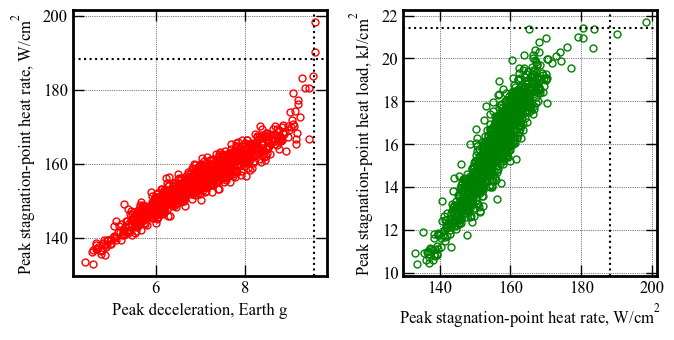

In [8]:
fig, axes = plt.subplots(1, 2, figsize = (6.5, 3.25))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].plot(y1, z1, 'ro', markersize=5, mfc='None')
axes[0].set_xlabel('Peak deceleration, Earth g', fontsize=12)
axes[0].set_ylabel('Peak stagnation-point heat rate, '+r'$W/cm^2$', fontsize=12)
axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=12)
axes[0].tick_params(axis='y',labelsize=12)
axes[0].axhline(y=np.percentile(z1, 99.87), linewidth=1.5, color='k', linestyle='dotted')
axes[0].axvline(x=np.percentile(y1, 99.87), linewidth=1.5, color='k', linestyle='dotted')

axes[1].plot(z1, h1, 'go', markersize=5, mfc='None')
axes[1].set_xlabel('Peak stagnation-point heat rate, '+r'$W/cm^2$', fontsize=12)
axes[1].set_ylabel('Peak stagnation-point heat load, '+r'$kJ/cm^2$', fontsize=12)

axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=12)
axes[1].tick_params(axis='y',labelsize=12)
axes[1].axhline(y=np.percentile(h1, 99.87), linewidth=1.5, color='k', linestyle='dotted')
axes[1].axvline(x=np.percentile(z1, 99.87), linewidth=1.5, color='k', linestyle='dotted')



for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)

plt.savefig('../../../data/acta-astronautica/smallsat-mission-concepts/venus/venus-smallsat-g-load-heat-rate.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/smallsat-mission-concepts/venus/venus-smallsat-g-load-heat-rate.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/smallsat-mission-concepts/venus/venus-smallsat-g-load-heat-rate.eps', dpi=300,bbox_inches='tight')


plt.show()

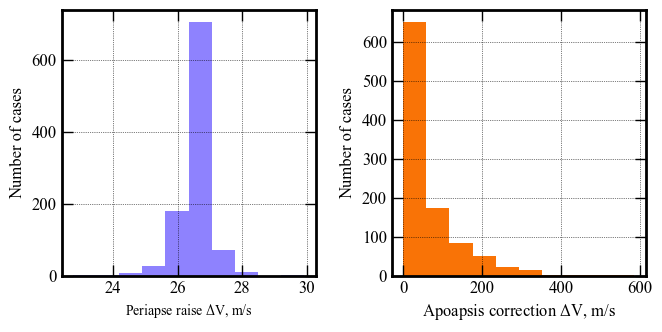

In [20]:
fig, axes = plt.subplots(1, 2, figsize = (6.5, 3.25))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].hist(u1, bins=10, color='xkcd:periwinkle')
axes[0].set_xlabel('Periapse raise '+r'$\Delta V$'+', m/s', fontsize=10)
axes[0].set_ylabel('Number of cases', fontsize=12)
axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=12)
axes[0].tick_params(axis='y',labelsize=12)

axes[1].hist(np.abs(v1), bins=10, color='xkcd:orange')
axes[1].set_xlabel('Apoapsis correction '+r'$\Delta V$'+', m/s', fontsize=12)
axes[1].set_ylabel('Number of cases', fontsize=12)
axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=12)
axes[1].tick_params(axis='y',labelsize=12)



for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)

plt.show()

In [9]:
def percent_between(a, lower, upper, closed_left=True, closed_right=True):
    """
    Finds the percentage of values between a range for a numpy array

    Parameters
    ----------
    a: np.ndarray
      numpy array to calculate percentage
    lower: int, float
      lower bound
    upper: int, float
      upper bound
    closed_left:
      closed left bound ( > vs >= )
    closed_right:
      closed right bound ( < vs <= )
    """
    l = np.greater if not closed_left else np.greater_equal
    r = np.less if not closed_right else np.less_equal

    c = l(a, lower) & r(a, upper)
    return np.count_nonzero(c) / float(a.size)

In [10]:
percent_between(x1, 1600, 2400)

0.8306613226452906

In [31]:
percent_between(x1, 1400, 2600)

0.8977955911823647

In [11]:
percent_between(x1, 1200, 2800)

0.9348697394789579

In [33]:
percent_between(x1, 1000, 3000)

0.9589178356713427

In [34]:
percent_between(x1, 1000, 5000)

0.998997995991984

In [12]:
print("--------------------------------------------------------------------------------------------------------")

print("Parameter              |      Min.     0.13-percentile      Mean      99.87-percentile      Max")
print("--------------------------------------------------------------------------------------------------------")
print("Apoapsis altitude, km  |    " + str(round(np.min(x1))) + "          " +  str(round(np.percentile(x1, 0.13))) +\
                                                                "         " +  str(round(np.average(x1))) +
                                                                "          " +  str(round(np.percentile(x1, 99.87)))+\
                                                                "          " +  str(round(np.max(x1))))
print("Periapsis altitude, km |       " + str(round(np.min(p1), 1)) + "             " +  str(round(np.percentile(p1, 0.13), 1)) +\
                                                                "            " +  str(round(np.average(p1), 1)) +
                                                                "             " +  str(round(np.percentile(p1, 99.87), 1))+\
                                                                "             " +  str(round(np.max(p1), 1)))
print("Peak deceleration, g   |       " + str(round(np.min(y1), 2)) + "           " +  str(round(np.percentile(y1, 0.13), 2)) +\
                                                                "           " +  str(round(np.average(y1), 2)) +
                                                                "            " +  str(round(np.percentile(y1, 99.87), 2))+\
                                                                "           " +  str(round(np.max(y1), 2)))

print("Peak heat rate, W/cm2  |       " + str(round(np.min(z1))) + "           " +  str(round(np.percentile(z1, 0.13))) +\
                                                                "           " +  str(round(np.average(z1))) +
                                                                "            " +  str(round(np.percentile(z1, 99.87)))+\
                                                                "            " +  str(round(np.max(z1))))

print("Peak heat load, kJ/cm2 |        " + str(round(np.min(h1),1)) + "            " +  str(round(np.percentile(h1, 0.13), 1)) +\
                                                                "            " +  str(round(np.average(h1), 1)) +
                                                                "             " +  str(round(np.percentile(h1, 99.87), 1))+\
                                                                "             " +  str(round(np.max(h1), 1)))
print("Periapsis raise dV, m/s|      " + str(round(np.min(u1), 1)) + "          " +  str(round(np.percentile(u1, 0.13), 1)) +\
                                                                "          " +  str(round(np.average(u1), 1)) +
                                                                "           " +  str(round(np.percentile(u1, 99.87), 1))+\
                                                                "           " +  str(round(np.max(u1), 1)))

print("Apoapsis corr. dV, m/s |     " + str(round(np.min(v1), 2)) + "         " +  str(round(np.percentile(v1, 0.13), 2)) +\
                                                                "           " +  str(round(np.average(v1), 2)) +
                                                                "          " +  str(round(np.percentile(v1, 99.87), 2))+\
                                                                "          " +  str(round(np.max(v1), 2)))

--------------------------------------------------------------------------------------------------------
Parameter              |      Min.     0.13-percentile      Mean      99.87-percentile      Max
--------------------------------------------------------------------------------------------------------
Apoapsis altitude, km  |    1345          1407         2081          4590          5336
Periapsis altitude, km |       97.8             98.0            101.3             103.1             103.2
Peak deceleration, g   |       4.41           4.58           6.98            9.56           9.58
Peak heat rate, W/cm2  |       133           134           156            188            198
Peak heat load, kJ/cm2 |        10.4            10.5            15.8             21.4             21.7
Periapsis raise dV, m/s|      22.8          23.4          26.6           29.1           29.9
Apoapsis corr. dV, m/s |     -584.59         -484.03           -55.85          134.73          154.78
